In [47]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits

class Dataset:
    """
    Class for intializing the dataset to use.
  
    Attributes:

    -----------
    
    Class attributes:
        - function: get_data:
            -get_data attributes: string dataset_name
            - returns : X,y as numpy arrays

    Example:
    
    -----------
    
    X,y = Digits().get_data('blobs')
    
    
    """
        
    def get_data(self, dataset_name):
        if dataset_name == "digits":
            digits = load_digits()
            X = digits.data
            y = digits.target
        elif dataset_name == 'blobs':
            X, y = make_blobs(n_samples=600, n_features = 10, cluster_std=0.4, random_state=0)
        else:
            print("Dataset type not found")
            pass
            
        return X,y

In [48]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns



class Embedding: 
    """
    - Class for creating and leveraging usage of embeddings.
    - Embedding is the process of converting high-dimensional data to low-dimensional data in the form of a 
    vector in such a way that the two are semantically similar. 
  
    Attributes:

    -----------
    
    Class attributes:
        - function: get_embedding:
            -get_embedding attributes: numpy array as X 
            -returns: embedding
        - function: get_embedding_plots:
            -get_embedding_plots attributes: 
                - string method_name
                - int n as number of principal components to reduce into
                - numpy array as X 
                - numpy array as y
                - string dataset_name
            -returns: plot of umap or pca as requested
                


    Example:
    
    -----------
    
    to get the embed for use:  Embedding().get_embedding(X)
    to get the plots:  Embedding().get_embedding_plots('umap',24,X,y,'digits')
    
    
    
    """
    
    def get_embedding(self,X):
        X = StandardScaler().fit_transform(X) #normalization
        reducer = umap.UMAP(random_state=42)
        reducer.fit(X)
        embedding = reducer.transform(X)
        return embedding
    
    def get_embedding_plots(self, method_name,n,X,y,dataset_name):
        if method_name == "umap":
            X = StandardScaler().fit_transform(X)
            reducer = umap.UMAP(random_state=42)
            reducer.fit(X)
            embedding = reducer.transform(X)
            assert(np.all(embedding == reducer.embedding_))
            #umap.plot.points(reducer)
            #tried creating various plot styles but was running into attribute errors due to compatibility issues 
            #with the version
            #umap.plot.points(reducer, labels=y, theme='fire')
            plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5, alpha=0.2, zorder=2)
            plt.gca().set_aspect('equal', 'datalim')
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            plt.xlabel('input values') , plt.ylabel('target values')
            plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
            plt.title('UMAP(2D) projection of the' +" " + dataset_name + " " + 'dataset', fontsize=20)
                
            
        elif method_name == 'PCA':
            pca = PCA(n)
            X = pca.fit_transform(X)       
            plt.style.use('seaborn-whitegrid')
            plt.figure(figsize = (10,n))
            c_map = plt.cm.get_cmap('rainbow', 10)
            plt.scatter(X[:, 0], X[:, 1], s = 15,
                        cmap = c_map , c = y, alpha=0.2,zorder=2)
            plt.colorbar()
            plt.title('')
            plt.xlabel('first prinicipal component - PC1') , plt.ylabel('second prinicpal component - PC2')
            plt.title('PCA projection of the' +" " + dataset_name + " " + 'dataset', fontsize=20);
            plt.show()
            
            pca = decomposition.PCA(n_components=2)
            pc = pca.fit_transform(X)
            df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2']})
            sns.barplot(x='PC',y="var", data=df, color="c")
            pc_df = pd.DataFrame(data = pc ,  columns = ["first prinicipal component - PC1", "second prinicipal component - PC2"])
            pc_df['Cluster'] = y
            sns.lmplot( x= "first prinicipal component - PC1", y="second prinicipal component - PC2", data=pc_df, fit_reg=False, hue='Cluster', legend=True,scatter_kws={"s": 80})
    
    def babyplt():
        reducer = umap.UMAP(random_state=42)
        reducer.fit(X)
        embedding = reducer.transform(X)
        reducer3d = umap.UMAP(random_state = 42, n_components = 3)
        reducer3d.fit(X)
        
        embedding3d = reducer3d.transform(X)
            
        bp = Babyplot()
        bp.add_plot(embedding3d.to_list(), 'pointcloud', 'categories', y.tolist(), {"colourScale": "Set2",
                                                                 "showLegend": True,
                                                                 "folded": True,
                                                                 "foldedEmbedding": embedding.tolist()})
            
            
            
            
            

In [55]:
import hdbscan
from sklearn.cluster import KMeans
from babyplots import Babyplot
import umap



class Clustering:   
    """
     
    - Class for clustering and leveraging usage for plotting outliers.
    - In machine learning grouping unlabeled examples is called clustering.As the examples are unlabeled, 
    clustering relies on unsupervised machine learning. 
    Attributes:

    -----------
    
    Class attributes:
        - function: get_cluster_attributes:
            -get_cluster attributes: embed 
            -returns: cluster labels and probabilities for further use
        - function: get_cluster_plots:
            -get_cluster_plots attributes: 
                - embedding created earlier as embed
                - string method_name
                - int n as number of clusters
                - string dataset_name
            -returns: cluster plots of using hdbscan or kmeans as requested
                
                


    Example:
    
    -----------
    
    to get the embed for use:  Clustering.get_cluster_attributes(e)
    to get the plots:  Clustering.get_cluster_plots('kmeans',e,3,'digits')
        
    
    """
        
    def get_cluster_attributes(self, embed):
            clusterer = hdbscan.HDBSCAN()
            clusterer.fit(embed)
            return clusterer.labels_, clusterer.probabilities_

    def get_cluster_plots(self, method_name, embed, n_clusters,dataset_name):
        if method_name == "hbdscan":
            clusterer = hdbscan.HDBSCAN()
            clusterer.fit(embed)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(embed)
            color_palette = sns.color_palette('deep',50)
            cluster_colors = [color_palette[x] if x >= 0
                              else (0.5, 0.5, 0.5)
                              for x in clusterer.labels_]
            cluster_member_colors = [sns.desaturate(x, p) for x, p in
                                     zip(cluster_colors, clusterer.probabilities_)]
            plt.scatter(*embed.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.2,zorder=1)
            plt.xlabel('input values') , plt.ylabel('target values')
            plt.title('Cluster plot of the' +" " + dataset_name + " " + 'dataset using HDBSCAN', fontsize=20)
            
            
            
        elif method_name == 'kmeans':
            X_kmeans = KMeans(n_clusters)
            X_kmeans.fit(embed)
            labels = X_kmeans.predict(embed)
            centroids = X_kmeans.cluster_centers_
            plt.scatter(embed[:, 0], embed[:, 1], c=labels, cmap = 'rainbow',alpha=0.2,zorder=1)
            plt.xlabel('input values') , plt.ylabel('target values')
            plt.title('Cluster plot of the' +" " + dataset_name + " " + 'dataset using Kmeans', fontsize=20)
            plt.show()
    
    def get_3D_with_2D_plot(self,X,y):
       
        reducer = umap.UMAP(random_state=42)
        reducer.fit(X)
        embedding = reducer.transform(X)
        reducer3d = umap.UMAP(random_state = 42, n_components = 3)
        reducer3d.fit(X)

        embedding3d = reducer3d.transform(X)

        bp = Babyplot()
        bp.add_plot(embedding3d.tolist(), "shapeCloud", "categories", y.tolist(), {"colourScale": "viridis",
                                                                 "showLegend": True,
                                                                 "folded": True,
                                                                 "foldedEmbedding": embedding.tolist()})

        return bp

       

In [50]:
class OutlierDetection:
    """
    - Class for clustering and leveraging usage for plotting outliers.
    - In machine learning grouping, outliers are extreme values that fall a long way outside of the other 
    observations.
    
    
    Attributes:

    -----------
    
    Class attributes:
        - function: get_outliers_plot:
            -get_outliers_plot attributes: 
                -embed
                -cluster probabilities
                -dataset_name
            -returns: plot of inliers vs outliers
        
                
                


    Example:
    
    -----------
    
    OutlierDetection().get_outliers_plots('e,p,'digits')
    
    """
    
    def get_outliers_plot(self, embed, p,dataset_name):
        mask_outliers = (p < 0.3)
        mask_inliers = ~mask_outliers
        plt.scatter(embed[mask_inliers, 0], embed[mask_inliers, 1], c= 'k', label='inliner', alpha=0.2,zorder=1)
        plt.scatter(embed[mask_outliers, 0], embed[mask_outliers, 1], c= 'r', label='outliers', alpha=0.2,zorder=1)
        plt.legend()
        plt.xlabel('input values') , plt.ylabel('target values')
        plt.title('Outlier plot of the' +" " + dataset_name + " " + 'dataset', fontsize=20)
            

In [51]:
X,y = Dataset().get_data('blobs')
e = Embedding().get_embedding(X)

In [52]:
X1,y1 = Dataset().get_data('digits')
e1 = Embedding().get_embedding(X1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


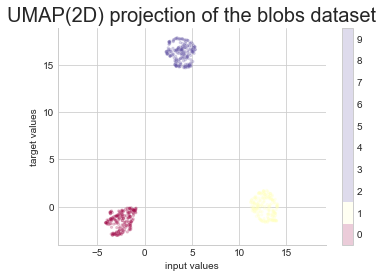

In [305]:
Embedding().get_embedding_plots('umap',2,X,y,'blobs')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


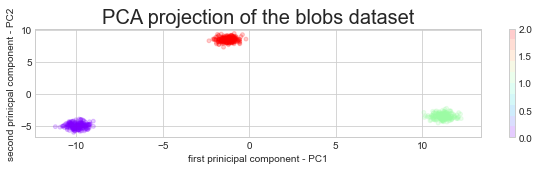

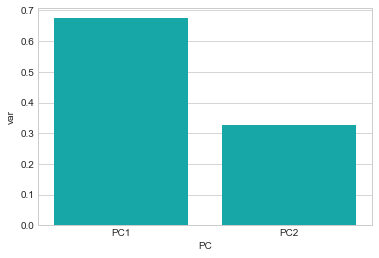

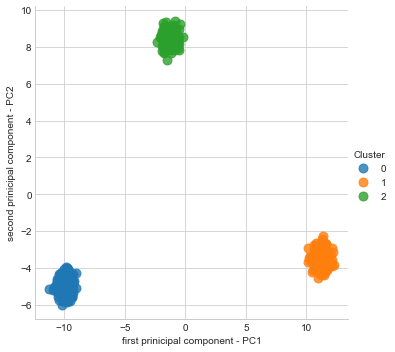

In [309]:
Embedding().get_embedding_plots('PCA',2,X,y, 'blobs')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


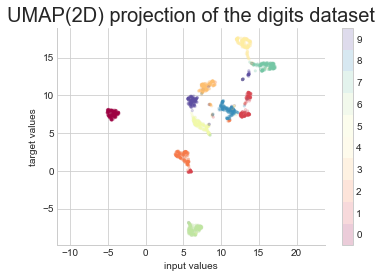

In [321]:
Embedding().get_embedding_plots('umap',24,X1,y1,'digits')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


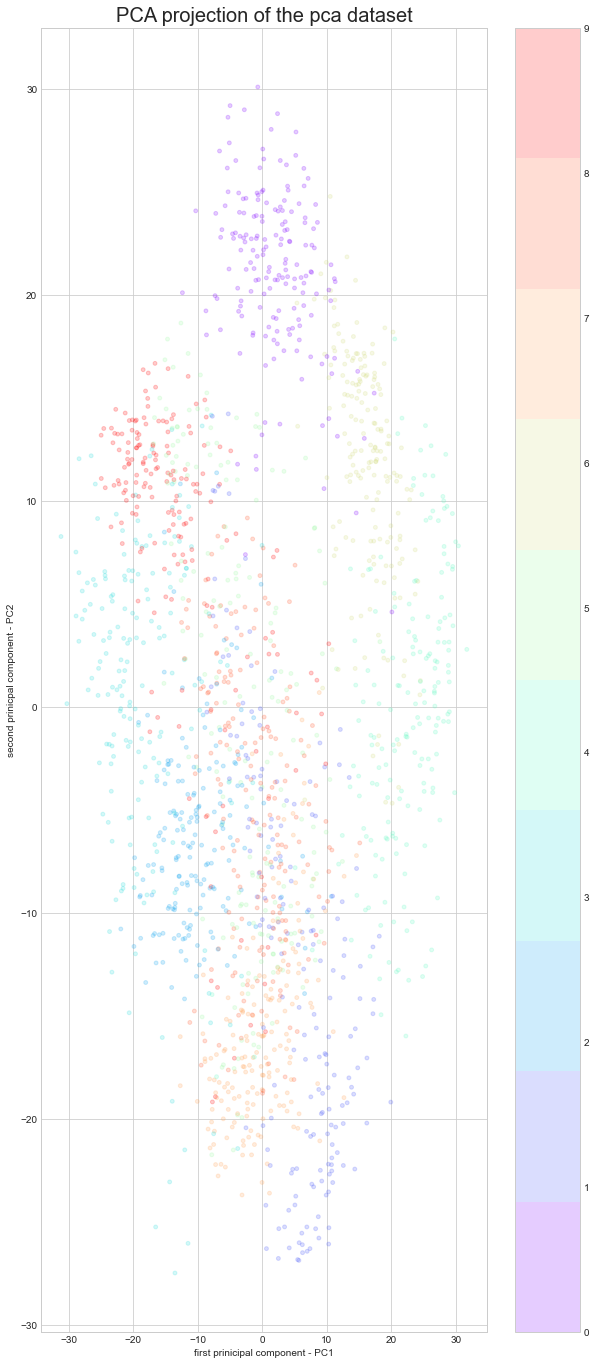

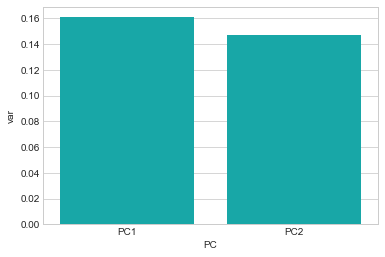

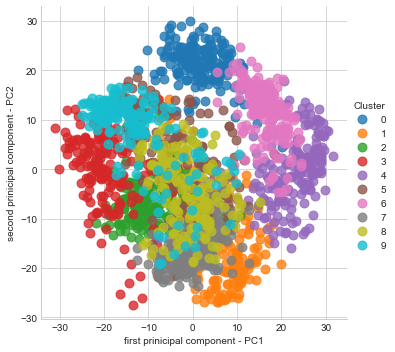

In [322]:
Embedding().get_embedding_plots('PCA',24,X1,y1,'pca')

In [312]:
c, p = Clustering().get_cluster_attributes(e)
c1, p1 = Clustering().get_cluster_attributes(e1)

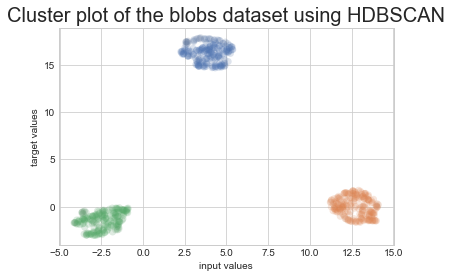

In [323]:
Clustering().get_cluster_plots('hbdscan', e,3, 'blobs')

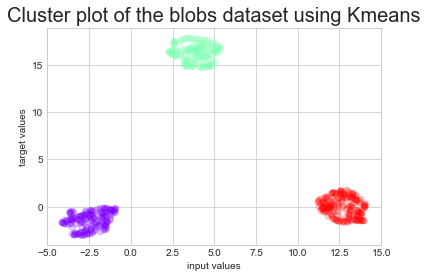

In [324]:
Clustering().get_cluster_plots('kmeans', e,3 , 'blobs')

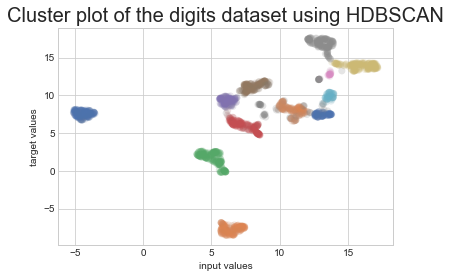

In [327]:
Clustering().get_cluster_plots('hbdscan', e1,3,'digits' )

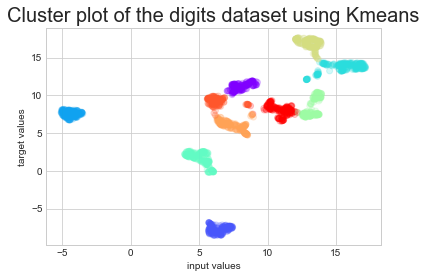

In [328]:
Clustering().get_cluster_plots('kmeans', e1,10,'digits' ) 


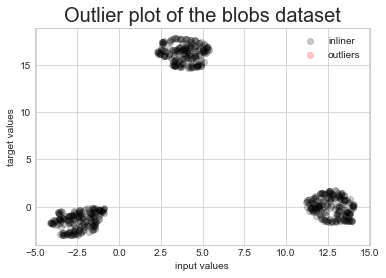

In [332]:
OutlierDetection().get_outliers_plot(e, p, 'blobs') #it's somewhat obvious as why we don't observe outliers here, 
#because the data is created synthetically and is clean and perfect. 

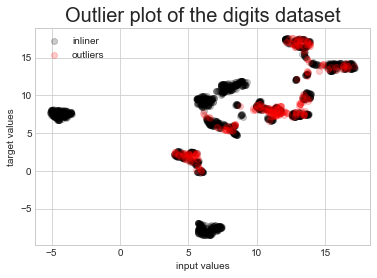

In [333]:
OutlierDetection().get_outliers_plot(e1, p1, 'digits')

In [57]:
Clustering().get_3D_with_2D_plot(X1,y1)
#rotates upon click

<IPython.core.display.Javascript object>